In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn import svm
from scipy import stats
import math
from math import exp
rcParams['figure.figsize'] = 6, 4

## Task 1 (5+5+5+5+5=25 pts)

### Consider the dataset HW2_task1.csv, a binary classification problem with two real-valued input attributes.  As you can see from the plot, the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are allowed) and  answer the following five questions: 

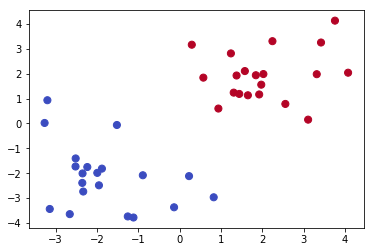

In [9]:
# Data
data1=pd.read_csv('HW2_task1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.show()

#### a. Report the separating hyperplane (line).

In [10]:
# your code here

# Fit the model.  Using a linear SVM; very large penalty for misclassification.
# Since the data is linearly separable, it won't misclassify any points.
clf = svm.SVC(kernel='linear',C=100000)  
clf.fit(X, Y)

# get the separating hyperplane w[0] x1 + w[1] x2 + intercept = 0
# transform to slope-intercept form: x2 = (-w[0]/w[1])x1 - (intercept/w[1])
w = clf.coef_[0]
a = -w[0] / w[1]
x1 = np.linspace(-2.5, 2.5)
x2 = a * x1 - (clf.intercept_[0]) / w[1]
print('Separating Hyperplane (line): x2 = %f * x1 - %f' % (a, (clf.intercept_[0]) / w[1]))

Separating Hyperplane (line): x2 = -1.176893 * x1 - 0.076650


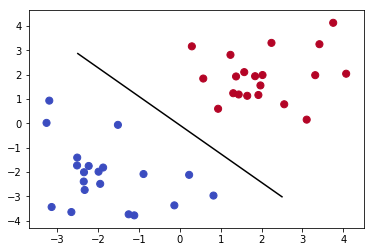

In [11]:
plt.gca()
plt.plot(x1, x2, 'k-')
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2)) #scatter points
plt.axis('tight')
plt.show()

#### b. List the support vectors.

In [12]:
# your code here
clf.support_vectors_

array([[ 0.22627536, -2.11810965],
       [-1.5180363 , -0.06399383],
       [ 0.93564585,  0.5969359 ]])

#### c. Calculate the upper and lower hyperplanes (lines) of the margin.

In [13]:
# your code here
# the parallels to the separating hyperplane (slope = a) that go through the support vectors.

b = clf.support_vectors_[0]
x2_down = a * x1 + (b[1] - a * b[0])
print('Lower Hyperplane (line): x2_down = %f * x1 + (%f)' % (a, (b[1] - a * b[0])))

b = clf.support_vectors_[-1]
x2_up = a * x1 + (b[1] - a * b[0])
print('Upper Hyperplane (line): x2_up = %f * x1 + %f' % (a, (b[1] - a * b[0])))

Lower Hyperplane (line): x2_down = -1.176893 * x1 + (-1.851808)
Upper Hyperplane (line): x2_up = -1.176893 * x1 + 1.698091


#### d. Compute the width of the margin.

In [14]:
# your code here
width = abs(1.698091 - (-1.851808))/ np.sqrt(np.square(-1.176893)+np.square(1))
width

2.2986073049228612

#### e. What would you expect to happen to the margin if the constant C was made very small?

C trades off misclassification rate against simplicity of the decision surface. A small constant C will lead to a smooth decision surface and less training examples classified correctly. 

## Task 2 (4+8+8=20 pts)

### Given the dataset provided below, answer the following two questions:

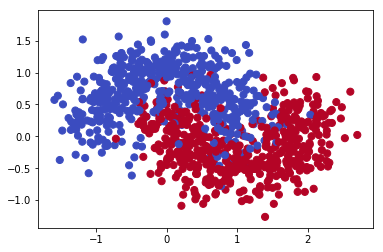

In [15]:
# Data 
data2=pd.read_csv('HW2_task2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]

plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));
plt.show()

# Generate training (X_train, Y_train) and testing (X_test, Y_test) datasets for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

### a. Train a polynomial SVM using the training set. Use the default arguments, and report both in-sample (training set) and out-of-sample (test set) classification accuracy.

In [16]:
# Polynomial kernel. (Default C=1, Poly=3)
clf = svm.SVC(kernel='poly')
clf.fit(X_train, Y_train)
correct_in_sample=1.0*(clf.predict(X_train)==np.asarray(Y_train)).sum()/len(Y_train)
correct_out_sample=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)

print "In sample, the polynomial kernel successfully predicts {} percent of the data".format((correct_in_sample)*100)
print "Out of sample, the polynomial kernel successfully predicts {} percent of the data".format(
                                                                                            (correct_out_sample)*100)

In sample, the polynomial kernel successfully predicts 81.3432835821 percent of the data
Out of sample, the polynomial kernel successfully predicts 82.7272727273 percent of the data


### Next we will use the validation subset in order to pick the optimal parameters for the polynomial model.

### b. Try polynomials of degree 1,2,3,4. For each degree, consider a variety of regularization constants from the range C=[math.exp(i) for i in np.linspace(-10,2*degree,200)] in order to evaluate the classifier performance over the validation set defined below.  Plot the graph of "Accuracy vs log(C)" for each degree.


### c. Choose the optimal degree and the optimal regularization constant C based on these graphs.  Use the optimal degree and C to compute and report the final out-of-sample accuracy of the best classification model selected. 

In [17]:
# Next we generate validation data (X_vali, Y_vali) from the training dataset. 
# Denote the remaining training data by (X_train_1, Y_train_1).
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, Y_train, test_size=0.33, random_state=99)

# your code here

In [21]:
def plot_accuracy_logC(degree):
    C = [np.exp(i) for i in np.linspace(-10, 2*degree, 200)] 
    OS_validation=[]
    for c in C:
        clf = svm.SVC(kernel='poly',C=c, degree=degree) 
        clf.fit(X_train_1, Y_train_1)
        correct=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali) # OS score for validation set
        OS_validation.append(correct)

    temp=pd.DataFrame([C,OS_validation]).T # put results together.
#     print temp
    print('Degree: %i, Optimal log(C): %f, Optimal C: %f, Optimal Accuracy: %f' 
          %(degree, np.log(temp[0][temp[1].idxmax()]), temp[0][temp[1].idxmax()], temp[1][temp[1].idxmax()]))
    
    correct=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
    print("Out of sample, we successfully predict {} percent of the data using a linear kernel".format((correct)*100))

    C=[np.log(y) for y in C] # for a better graph
    plt.gca()
    plt.plot(C,OS_validation,'b',)
    plt.legend(loc='upper right')
    plt.ylabel('Accuracy')
    plt.xlabel('log(C)')
    plt.title('Accuracy vs log(C), degree = %i'%degree)
    plt.show()

Degree: 1, Optimal log(C): 0.070352, Optimal C: 1.072886, Optimal Accuracy: 0.837838
Out of sample, we successfully predict 86.6666666667 percent of the data using a linear kernel


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


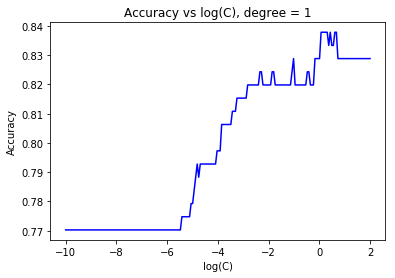

Degree: 2, Optimal log(C): 0.552764, Optimal C: 1.738050, Optimal Accuracy: 0.743243
Out of sample, we successfully predict 71.8181818182 percent of the data using a linear kernel


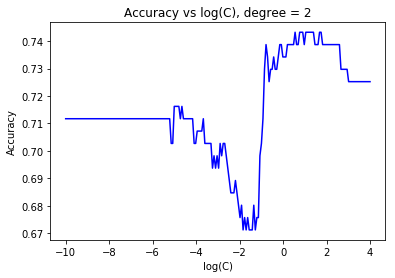

Degree: 3, Optimal log(C): 3.266332, Optimal C: 26.214997, Optimal Accuracy: 0.873874
Out of sample, we successfully predict 87.2727272727 percent of the data using a linear kernel


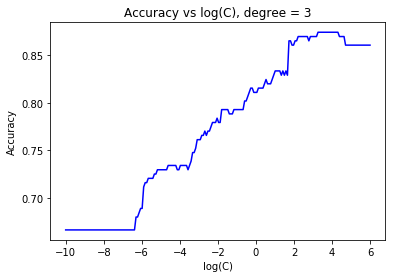

Degree: 4, Optimal log(C): 0.311558, Optimal C: 1.365551, Optimal Accuracy: 0.720721
Out of sample, we successfully predict 67.2727272727 percent of the data using a linear kernel


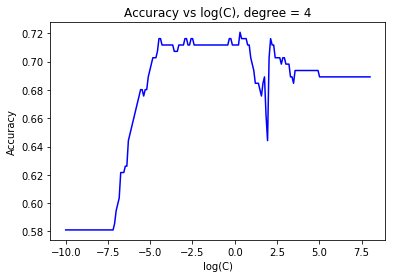

In [19]:
for d in range(1, 5):
    plot_accuracy_logC(d)

**Answer:**

According to the plots above, optimal Degree=3.

**Optimal C: 26.214997, Optimal Accuracy: 0.873874**

**Out of sample, we successfully predict 87.2727272727 percent of the data using a linear kernel**

## Task 3 (5+5=10pts).

### This task is to be done by hand rather than using Python.

Assume you have a data set as below. It contains records of cars with three features: the type of the car (sports or SUV), the color of the car (red or yellow), and the origin of the car (domestic or imported). And the labels for the data are yes (car was stolen) and no (car was not stolen).

CarType,Color,Origin,Stolen?

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,no

SUV,red,domestic,no

SUV,red,imported,yes

SUV,yellow,imported,no

SUV,yellow,imported,yes

SUV,yellow,domestic,no

sports,yellow,imported,no

sports,red,imported,yes


### a) Calculate the following sample probabilities:

P(Yes) = 6/11

P(No) = 5/11

P(Red|Yes) = 5/6

P(SUV|Yes) = 1/3

P(Domestic|Yes) = 1/2

P(Red|No) = 2/5

P(SUV|No) = 3/5

P(Domestic|No) = 3/5

### b) Using naive Bayes classification, what is the probability that a red, domestic SUV will be stolen? Show your work.
$$P(Yes|red, domestic, SUV)$$ 

$$= \frac{P(red, domestic, SUV|Yes) * P(Yes)}{(P(red, domestic, SUV|Yes) * P(Yes) + P(red, domestic, SUV|Yes) * P(No))}$$

$$= \frac{P(red|Yes) * P(domestic|Yes) * P(SUV|Yes) * P(Yes)} {(P(red|Yes) * P(domestic|Yes) * P(SUV|Yes) * P(Yes) + P(red|No) * P(domestic|No) * P(SUV|No) * P(No))}$$

$$ = \frac {125} {233} $$

$$ = 0.5365$$

## Task 4 (4+2+2+2=10pts)

Consider the following problem involving Gaussian Naive Bayes classification.  We use eight factors to predict if people have diabetes or not. The variables are:

y: The label (0 - no diabetes, 1 - diabetes)

t_pre: Number of times pregnant

glu: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

blood_p: Diastolic blood pressure (mm Hg)

triceps: Triceps skin fold thickness (mm)

serum: 2-Hour serum insulin (mu U/ml)

b_m: Body mass index (weight in kg/(height in m)^2)

pedigree_f: Diabetes pedigree function

age: Age (years)

### Using the data provided below, learn a Naive Bayes classifier from the training data and answer the following questions: 

In [22]:
# Training data
data_train=pd.read_csv("HW2_task4_train.csv") 
y_train=data_train.iloc[:,1] 
X_train=data_train.iloc[:,2:] 

# Testing data
data_test=pd.read_csv("HW2_task4_test.csv")
y_test=data_test.iloc[:,1]
X_test=data_test.iloc[:,2:]

print X_train.head()

   t_pre    glu  blood_p  triceps  serum   b_m  pedigree_f   age
0    3.0  158.0     64.0     13.0  387.0  31.2       0.295  24.0
1    0.0   84.0     64.0     22.0   66.0  35.8       0.545  21.0
2    9.0  120.0     72.0     22.0   56.0  20.8       0.733  48.0
3    4.0  110.0     76.0     20.0  100.0  28.4       0.118  27.0
4    2.0  100.0     66.0     20.0   90.0  32.9       0.867  28.0


In [42]:
# Training a binary Gaussian Naive Bayes Classifier with real-valued input attributes.
# Assume that the binary output variable takes on values 0 or 1. 
def trainGaussianNaiveBayes(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_1 = X[y==1]
    X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_mu1'] = X_1[j].mean()
        nbc[j+'_sigma1'] = X_1[j].std()
        nbc[j+'_mu0'] = X_0[j].mean()
        nbc[j+'_sigma0'] = X_0[j].std()
    return nbc

def testGaussianNaiveBayes(X,nbc):
    y_pred = pd.Series(index=X.index)
    for i in X.index:
        # compute odds of y=1
        y_pred[i] = nbc['prior']/(1-nbc['prior']) # prior odds
        for j in X.columns:
            thevalue = X.loc[i,j]
            pdf1 = stats.norm.pdf(thevalue,loc=nbc[j+'_mu1'],scale=nbc[j+'_sigma1'])
            pdf0 = stats.norm.pdf(thevalue,loc=nbc[j+'_mu0'],scale=nbc[j+'_sigma0'])
            y_pred[i] = y_pred[i]*pdf1/pdf0 if pdf0 > 0 else 1E10
        # convert odds to probability of y=1
        y_pred[i] = y_pred[i]/(1.0+y_pred[i])
    return y_pred

In [47]:
naive_bayes_classifier = trainGaussianNaiveBayes(X_train,y_train)

### a) What is the prediction accuracy for Naive Bayes, both in sample (on the training data) and out of sample (on the test data)?

In [46]:
# your code here
y_pred_train = testGaussianNaiveBayes(X_train,naive_bayes_classifier)
y_pred_test = testGaussianNaiveBayes(X_test,naive_bayes_classifier)

# measure accuracy for the binary prediction task
print 'In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_train)/len(y_train)
print 'Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_test)/len(y_test)

In sample prediction accuracy: 0.762711864407
Out of sample prediction accuracy: 0.791139240506


### b) What is the prior probability of diabetes, learned from the training data?

In [55]:
# your code here
for i,j in naive_bayes_classifier.items():
    if i == 'prior':
        print i
        print j

prior
0.300847457627


### c) What is the mean and variance of each input variable for patients with diabetes?

In [67]:
for i,j in naive_bayes_classifier.items():
    if '1' in i:
        print i
        print j
        print

b_m_sigma1
6.25849057084

pedigree_f_sigma1
0.439042023261

age_mu1
35.7887323944

glu_sigma1
30.626457178

serum_mu1
209.211267606

blood_p_mu1
74.5633802817

serum_sigma1
126.921000794

t_pre_mu1
4.07042253521

b_m_mu1
35.223943662

blood_p_sigma1
13.7993088796

t_pre_sigma1
3.51861963057

triceps_sigma1
9.76269745354

triceps_mu1
33.4788732394

age_sigma1
10.2635492231

glu_mu1
144.14084507

pedigree_f_mu1
0.639042253521



### d) What is the mean and variance of each input variable for patients without diabetes?

In [69]:
# your code here
for i,j in naive_bayes_classifier.items():
    if '0' in i:
        print i
        print j
        print

b_m_sigma0
6.33761340575

pedigree_f_sigma0
0.291750327733

age_mu0
28.3939393939

serum_mu0
127.006060606

blood_p_mu0
69.2060606061

serum_sigma0
91.4861376258

t_pre_mu0
2.69090909091

b_m_mu0
31.7090909091

blood_p_sigma0
11.7132908509

t_pre_sigma0
2.6100606988

triceps_sigma0
10.4369185248

glu_sigma0
24.6918899822

triceps_mu0
27.2

age_sigma0
8.53736191168

glu_mu0
111.466666667

pedigree_f_mu0
0.468684848485



## Task 5 (10+15=25 pts)

We have an artificial data set split, where the training set contains both labeled and unlabeled data. Column 'y' is the label, and columns '0','1','2' are categorical variables.

In [135]:
data_train=pd.read_csv("HW2_task5_train.csv")
y_Labeled_train=data_train.iloc[:,1] 
X_Labeled_train=data_train.iloc[:,2:] 

data_test=pd.read_csv("HW2_task5_test.csv")
y_Labeled_test=data_test.iloc[:,1]
X_Labeled_test=data_test.iloc[:,2:]

data_Unlabeled=pd.read_csv("HW2_task5_unlabeled.csv")
X_Unlabeled_train=data_Unlabeled.iloc[:,1:]

print X_Labeled_train # categorial variables

print y_Labeled_train # column y: the labels

   0  1  2
0  4  6  6
1  2  2  2
2  2  6  2
3  6  6  6
4  1  2  2
5  3  4  4
6  6  1  6
7  1  3  1
8  5  1  6
0    0
1    1
2    0
3    0
4    1
5    0
6    0
7    1
8    1
Name: y, dtype: int64


### a) Learn a discrete Naive Bayes classifier from  X_Labeled_train, use it to predict the labels of X_Labeled_test, and report the classification accuracy.

In [136]:
# your code here
# Training a binary Naive Bayes Classifier with discrete input attributes.
# Assume that the binary output variable takes on values 0 or 1. 
def trainNaiveBayesDiscrete(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_1 = X[y==1]
    X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_1'] = X_1[j].value_counts(normalize=True)
        nbc[j+'_0'] = X_0[j].value_counts(normalize=True)
    return nbc

def testNaiveBayesDiscrete(X,nbc):
    y_pred = pd.Series(index=X.index)
    for i in X.index:
        # compute odds of y=1
        y_pred[i] = nbc['prior']/(1-nbc['prior']) # prior odds
        for j in X.columns:
            thevalue = X.loc[i,j]
            if thevalue not in nbc[j+'_1']:
                y_pred[i] = y_pred[i]*1E-3
            if thevalue not in nbc[j+'_0']:
                y_pred[i] = y_pred[i]*1E3
            if (thevalue in nbc[j+'_1']) & (thevalue in nbc[j+'_0']):
                y_pred[i] = y_pred[i]*(nbc[j+'_1'][thevalue]+1E-3)/(nbc[j+'_0'][thevalue]+1E-3)
        # convert odds to probability of y=1
        y_pred[i] = y_pred[i]/(1.0+y_pred[i])
    return y_pred

In [141]:
naive_bayes_classifier = trainNaiveBayesDiscrete(X_Labeled_train, y_Labeled_train)

y_Labeled_pred_train = testNaiveBayesDiscrete(X_Labeled_train,naive_bayes_classifier)
y_Labeled_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)

# measure accuracy for the binary prediction task
print 'In sample prediction accuracy:',1.0*sum((y_Labeled_pred_train>0.5)==y_Labeled_train)/len(y_Labeled_train)
print 'Out of sample prediction accuracy:',1.0*sum((y_Labeled_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test)

In sample prediction accuracy: 1.0
Out of sample prediction accuracy: 0.694444444444


### b) Improve the classification by using the unlabeled data, data_Unlabeled, and the EM semi-supervised algorithm to predict the labels of X_Labeled_test, and report the new accuracy.

In [133]:
# your code here
def initializeNaiveBayesRandom(X_Unlabeled):
    nbc = {'prior':0.5}
    for j in X_Unlabeled.columns:
        thevalues = X_Unlabeled[j].unique()
        nbc[j+'_1'] = {}
        nbc[j+'_0'] = {}
        for jj in thevalues:
            nbc[j+'_1'][jj] = np.random.rand()
            nbc[j+'_0'][jj] = np.random.rand()
    return nbc
    
def EM(X_Labeled,y_Labeled,X_Unlabeled,num_iters):

    # initialize
    
    t = 0
    
    if len(y_Labeled) > 0:
        nbc = trainNaiveBayesDiscrete(X_Labeled,y_Labeled)
    else:
        nbc = initializeNaiveBayesRandom(X_Unlabeled)
    
    while True:
        t = t + 1
        print 'Iteration',t,'of',num_iters
        
        # E step - classify with nbc for unlabeled data only
        y_pred_Unlabeled = testNaiveBayesDiscrete(X_Unlabeled,nbc)
        
        # M step
        X_for_M_step = pd.concat([X_Labeled,X_Unlabeled]).reset_index(drop=True) 
        y_for_M_step = pd.concat([y_Labeled,y_pred_Unlabeled]).reset_index(drop=True)
        prior = 1.*y_for_M_step.sum()/y_for_M_step.count()
        nbc = {'prior':prior}
        for j in X_for_M_step.columns:
            nbc[j+'_1'] = {}
            nbc[j+'_0'] = {}
            for theindex in X_for_M_step.index:
                current_X = X_for_M_step.loc[theindex,j]
                current_y = y_for_M_step.loc[theindex]
                if current_X in nbc[j+'_1']:
                    nbc[j+'_1'][current_X] += current_y
                else:
                    nbc[j+'_1'][current_X] = current_y
                if current_X in nbc[j+'_0']:
                    nbc[j+'_0'][current_X] += (1.0-current_y)
                else:
                    nbc[j+'_0'][current_X] = 1.0-current_y
            # normalize probabilities
            tempsum = 0.0
            for k in nbc[j+'_1']:
                tempsum += nbc[j+'_1'][k]
            for k in nbc[j+'_1']:
                nbc[j+'_1'][k] /= tempsum
            tempsum = 0.0
            for k in nbc[j+'_0']:
                tempsum += nbc[j+'_0'][k]
            for k in nbc[j+'_0']:
                nbc[j+'_0'][k] /= tempsum            
                       
        if t==num_iters:
            break
            
    return nbc

In [140]:
naive_bayes_classifier=EM(X_Labeled_train, y_Labeled_train, X_Unlabeled_train, num_iters=50)

y_pred_test = testNaiveBayesDiscrete(X_Labeled_test, naive_bayes_classifier)

# measure accuracy for the binary prediction task
print 'Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test)

Iteration 1 of 50
Iteration 2 of 50
Iteration 3 of 50
Iteration 4 of 50
Iteration 5 of 50
Iteration 6 of 50
Iteration 7 of 50
Iteration 8 of 50
Iteration 9 of 50
Iteration 10 of 50
Iteration 11 of 50
Iteration 12 of 50
Iteration 13 of 50
Iteration 14 of 50
Iteration 15 of 50
Iteration 16 of 50
Iteration 17 of 50
Iteration 18 of 50
Iteration 19 of 50
Iteration 20 of 50
Iteration 21 of 50
Iteration 22 of 50
Iteration 23 of 50
Iteration 24 of 50
Iteration 25 of 50
Iteration 26 of 50
Iteration 27 of 50
Iteration 28 of 50
Iteration 29 of 50
Iteration 30 of 50
Iteration 31 of 50
Iteration 32 of 50
Iteration 33 of 50
Iteration 34 of 50
Iteration 35 of 50
Iteration 36 of 50
Iteration 37 of 50
Iteration 38 of 50
Iteration 39 of 50
Iteration 40 of 50
Iteration 41 of 50
Iteration 42 of 50
Iteration 43 of 50
Iteration 44 of 50
Iteration 45 of 50
Iteration 46 of 50
Iteration 47 of 50
Iteration 48 of 50
Iteration 49 of 50
Iteration 50 of 50
Out of sample prediction accuracy: 0.944444444444
